In [2734]:
import os
import cv2
import numpy as np
import random
from IPython.display import display, clear_output, HTML
import ipywidgets as widgets
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path


In [2735]:
from generate_bottle_module import BottleGroup, ImageComposer

In [2736]:
class BottleGenerator:
    def __init__(self):
        self.CANVAS_WIDTH = 530
        self.CANVAS_HEIGHT = 1100
        self.BOTTLE_WIDTH = 288
        self.BOTTLE_HEIGHT = 665
        self.GREEN_BG = (210, 210, 210, 255)
        #self.image_dir = "Create_bottles\Images"
        self.image_dir = Path("Images")
        
        # Проверяем директорию с изображениями
        if not os.path.exists(self.image_dir):
            os.makedirs(self.image_dir)
            print(f"Создана папка {self.image_dir}. Добавьте изображения компонентов бутылки.")
        else:
            print(f"Папка {self.image_dir} существует")
    
        # Создаем холст конвейера
        self.conveyor = np.zeros((self.CANVAS_HEIGHT, self.CANVAS_WIDTH, 4), dtype=np.uint8)
        self.conveyor[:] = self.GREEN_BG
        
        # Параметры по умолчанию
        self.params = {
            'fill_level': 0.7,
            'fill_level_delta': 0.1,
            'cap_visible': True,
            'ring_visible': True,
            'label_visible': True,
            'label_offset': 0,
            'label_angle': 0,
            'label_vertical_offset': 0,
            'bottle_spacing': 160,
            'n_bottles': 1
        }
        
        # Конфигурация частей бутылки
        self.bottle_config = {
            "bottle": {
                "file": "bottle3.png",
                "position": (0, 90),
                "angle": 0,
                "scale": 1.0,
                "visible": True,
                "offset": 0,
                "filler_enable": True,
                "filler_level": 0.7,
                "filler_color": (100, 200, 200, 180),
            },
            "cap": {
                "file": "cap2.png",
                "position": (51, 122),
                "angle": 0,
                "scale": 1.0,
                "visible": True,
                "offset": 0
            },
            "ring": {
                "file": "ring2.png",
                "position": (51, 155),
                "angle": 0,
                "scale": 1.0,
                "visible": True,
                "offset": 0
            },
            "label": {
                "file": "eticet2.png",
                "position": (0, 490),
                "angle": 0,
                "scale": 1.0,
                "visible": True, 
                "offset": 0
            }
        }
    
    def generate_image(self):
        """Генерирует изображение с текущими параметрами"""
        composer = ImageComposer(self.CANVAS_WIDTH, self.CANVAS_HEIGHT, (0, 0, 0, 0))
        composer.add_layer(self.conveyor, (0, 0))
        
        #start_x = 100
        #current_x = start_x
        
        for i in range(self.params['n_bottles']):
            config = {k: v.copy() for k, v in self.bottle_config.items()}
            
            # Уровень наполнения
            config['bottle']['filler_level'] = max(0, min(1, 
                self.params['fill_level'] + 
                random.uniform(-self.params['fill_level_delta'], self.params['fill_level_delta'])
            ))
            
            # Видимость элементов
            config['cap']['visible'] = self.params['cap_visible'] and (random.random() > 0.1)
            config['ring']['visible'] = self.params['ring_visible'] and (random.random() > 0.1)
            
            # Параметры этикетки
            config['label']['visible'] = self.params['label_visible']
            if self.params['label_visible']:
                config['label']['offset'] = self.params['label_offset']
                config['label']['angle'] = self.params['label_angle']
                base_pos = config['label']['position']
                config['label']['position'] = (base_pos[0], base_pos[1] + self.params['label_vertical_offset'])
            
            # Создаем бутылку
            bottle = BottleGroup(self.image_dir, config, position=(80, 0))
            
            # Добавляем слои
            for img, pos in bottle.get_layers():
                composer.add_layer(img, pos)
            
            #current_x += self.BOTTLE_WIDTH + self.params['bottle_spacing']

        return composer.compose()

In [2737]:
print("Полный путь к папке:", (Path("Images").absolute()))

Полный путь к папке: c:\Users\INNOTECH\Desktop\Inspector_bottles\Create_bottles\Images


In [2738]:
# Создаем генератор (глобальная переменная для доступа из других ячеек)
generator = BottleGenerator()


Папка Images существует


In [2739]:
# Добавляем CSS стили для всех виджетов
display(HTML("""
<style>
    /* Общий стиль для всех виджетов */
    .widget-box {
        background-color: #202020 !important;
        padding: 12px !important;
        border-radius: 6px !important;
        margin-bottom: 15px !important;
    }
    
    /* Стиль текста (работает для всех виджетов) */
    .widget-label, 
    .widget-readout,
    .widget-checkbox label,
    .widget-toggle-button label,
    .widget-button,
    .widget-dropdown > select,
    .widget-select > select,
    .widget-text input,
    .widget-textarea textarea {
        color: #ffffff !important;
        font-size: 14px !important;
    }
    
    /* Стиль слайдеров */
    .widget-slider .ui-slider {
        background: #333333 !important;
    }
    .widget-slider .ui-slider-range {
        background: #555555 !important;
    }
    .widget-slider .ui-slider-handle {
        background: #ffffff !important;
        border: 2px solid #ffffff !important;
        width: 16px !important;
        height: 16px !important;
        margin-top: -7px !important;
    }
    
    /* Стиль чекбоксов */
    .widget-checkbox input[type="checkbox"] {
        filter: invert(1) hue-rotate(180deg) brightness(1.5);
        margin-right: 8px;
    }
    
    /* Стиль кнопок */
    .widget-button {
        background-color: #444444 !important;
        border: 1px solid #666666 !important;
    }
    .widget-button:hover {
        background-color: #555555 !important;
    }
    
    /* Стиль выпадающих списков */
    .widget-dropdown > select,
    .widget-select > select {
        background-color: #333333 !important;
        border: 1px solid #555555 !important;
    }
    
    /* Стиль текстовых полей */
    .widget-text input,
    .widget-textarea textarea {
        background-color: #333333 !important;
        border: 1px solid #555555 !important;
    }
</style>
"""))

# Настройки стиля и layout
style = {
    'description_width': '250px',
    'handle_color': 'white',
    'text_color': 'white'
}

layout = widgets.Layout(
    width='800px',
    margin='0 0 20px 0',
    padding='10px'
)


# Создаем элементы управления
controls = {
    'fill_level': widgets.FloatSlider(
        value=generator.params['fill_level'], 
        min=0, max=1.0, step=0.01, 
        description='Уровень наполнения:',
        style=style,
        layout=layout
    ),
    'fill_level_delta': widgets.FloatSlider(
        value=generator.params['fill_level_delta'], 
        min=0, max=0.3, step=0.01, 
        description='Вариативность наполнения:',
        style=style,
        layout=layout
    ),
    'cap_visible': widgets.Checkbox(
        value=generator.params['cap_visible'], 
        description='Крышка видима',
        style=style,
        layout=layout
    ),
    'ring_visible': widgets.Checkbox(
        value=generator.params['ring_visible'], 
        description='Кольцо видимо',
        style=style,
        layout=layout
    ),
    'label_visible': widgets.Checkbox(
        value=generator.params['label_visible'], 
        description='Этикетка видима',
        style=style,
        layout=layout
    ),
    'label_offset': widgets.IntSlider(
        value=generator.params['label_offset'], 
        min=0, max=50, 
        description='Смещение этикетки:',
        style=style,
        layout=layout
    ),
    'label_angle': widgets.IntSlider(
        value=generator.params['label_angle'], 
        min=-30, max=30, 
        description='Угол поворота этикетки:',
        style=style,
        layout=layout
    ),
    'label_vertical_offset': widgets.IntSlider(
        value=generator.params['label_vertical_offset'], 
        min=-40, max=40, 
        description='Вертикальное смещение этикетки:',
        style=style,
        layout=layout
    ),
    'bottle_spacing': widgets.IntSlider(
        value=generator.params['bottle_spacing'], 
        min=50, max=300, 
        description='Расстояние между бутылками:',
        style=style,
        layout=layout
    ),
    'n_bottles': widgets.IntSlider(
        value=generator.params['n_bottles'], 
        min=1, max=10, 
        description='Количество бутылок:',
        style=style,
        layout=layout
    )
}

# Кнопка для применения параметров
apply_btn = widgets.Button(
    description="Применить параметры", 
    button_style='primary',
    icon='check'
)

# Функция для применения параметров
def apply_parameters(b):
    # Обновляем параметры в генераторе
    generator.params = {
        'fill_level': controls['fill_level'].value,
        'fill_level_delta': controls['fill_level_delta'].value,
        'cap_visible': controls['cap_visible'].value,
        'ring_visible': controls['ring_visible'].value,
        'label_visible': controls['label_visible'].value,
        'label_offset': controls['label_offset'].value,
        'label_angle': controls['label_angle'].value,
        'label_vertical_offset': controls['label_vertical_offset'].value,
        'bottle_spacing': controls['bottle_spacing'].value,
        'n_bottles': controls['n_bottles'].value
    }
    print("Параметры успешно применены!")

# Привязываем функцию к кнопке
apply_btn.on_click(apply_parameters)

# Отображаем элементы управления
display(widgets.VBox([
    widgets.Label(value="🎚️ Настройте параметры генерации:"),
    controls['fill_level'],
    controls['fill_level_delta'],
    controls['n_bottles'],
    controls['bottle_spacing'],
    widgets.HBox([controls['cap_visible'], controls['ring_visible'], controls['label_visible']]),
    controls['label_offset'],
    controls['label_angle'],
    controls['label_vertical_offset'],
    apply_btn
]))

In [2740]:
# Генерируем изображение с текущими параметрами
frame = generator.generate_image()

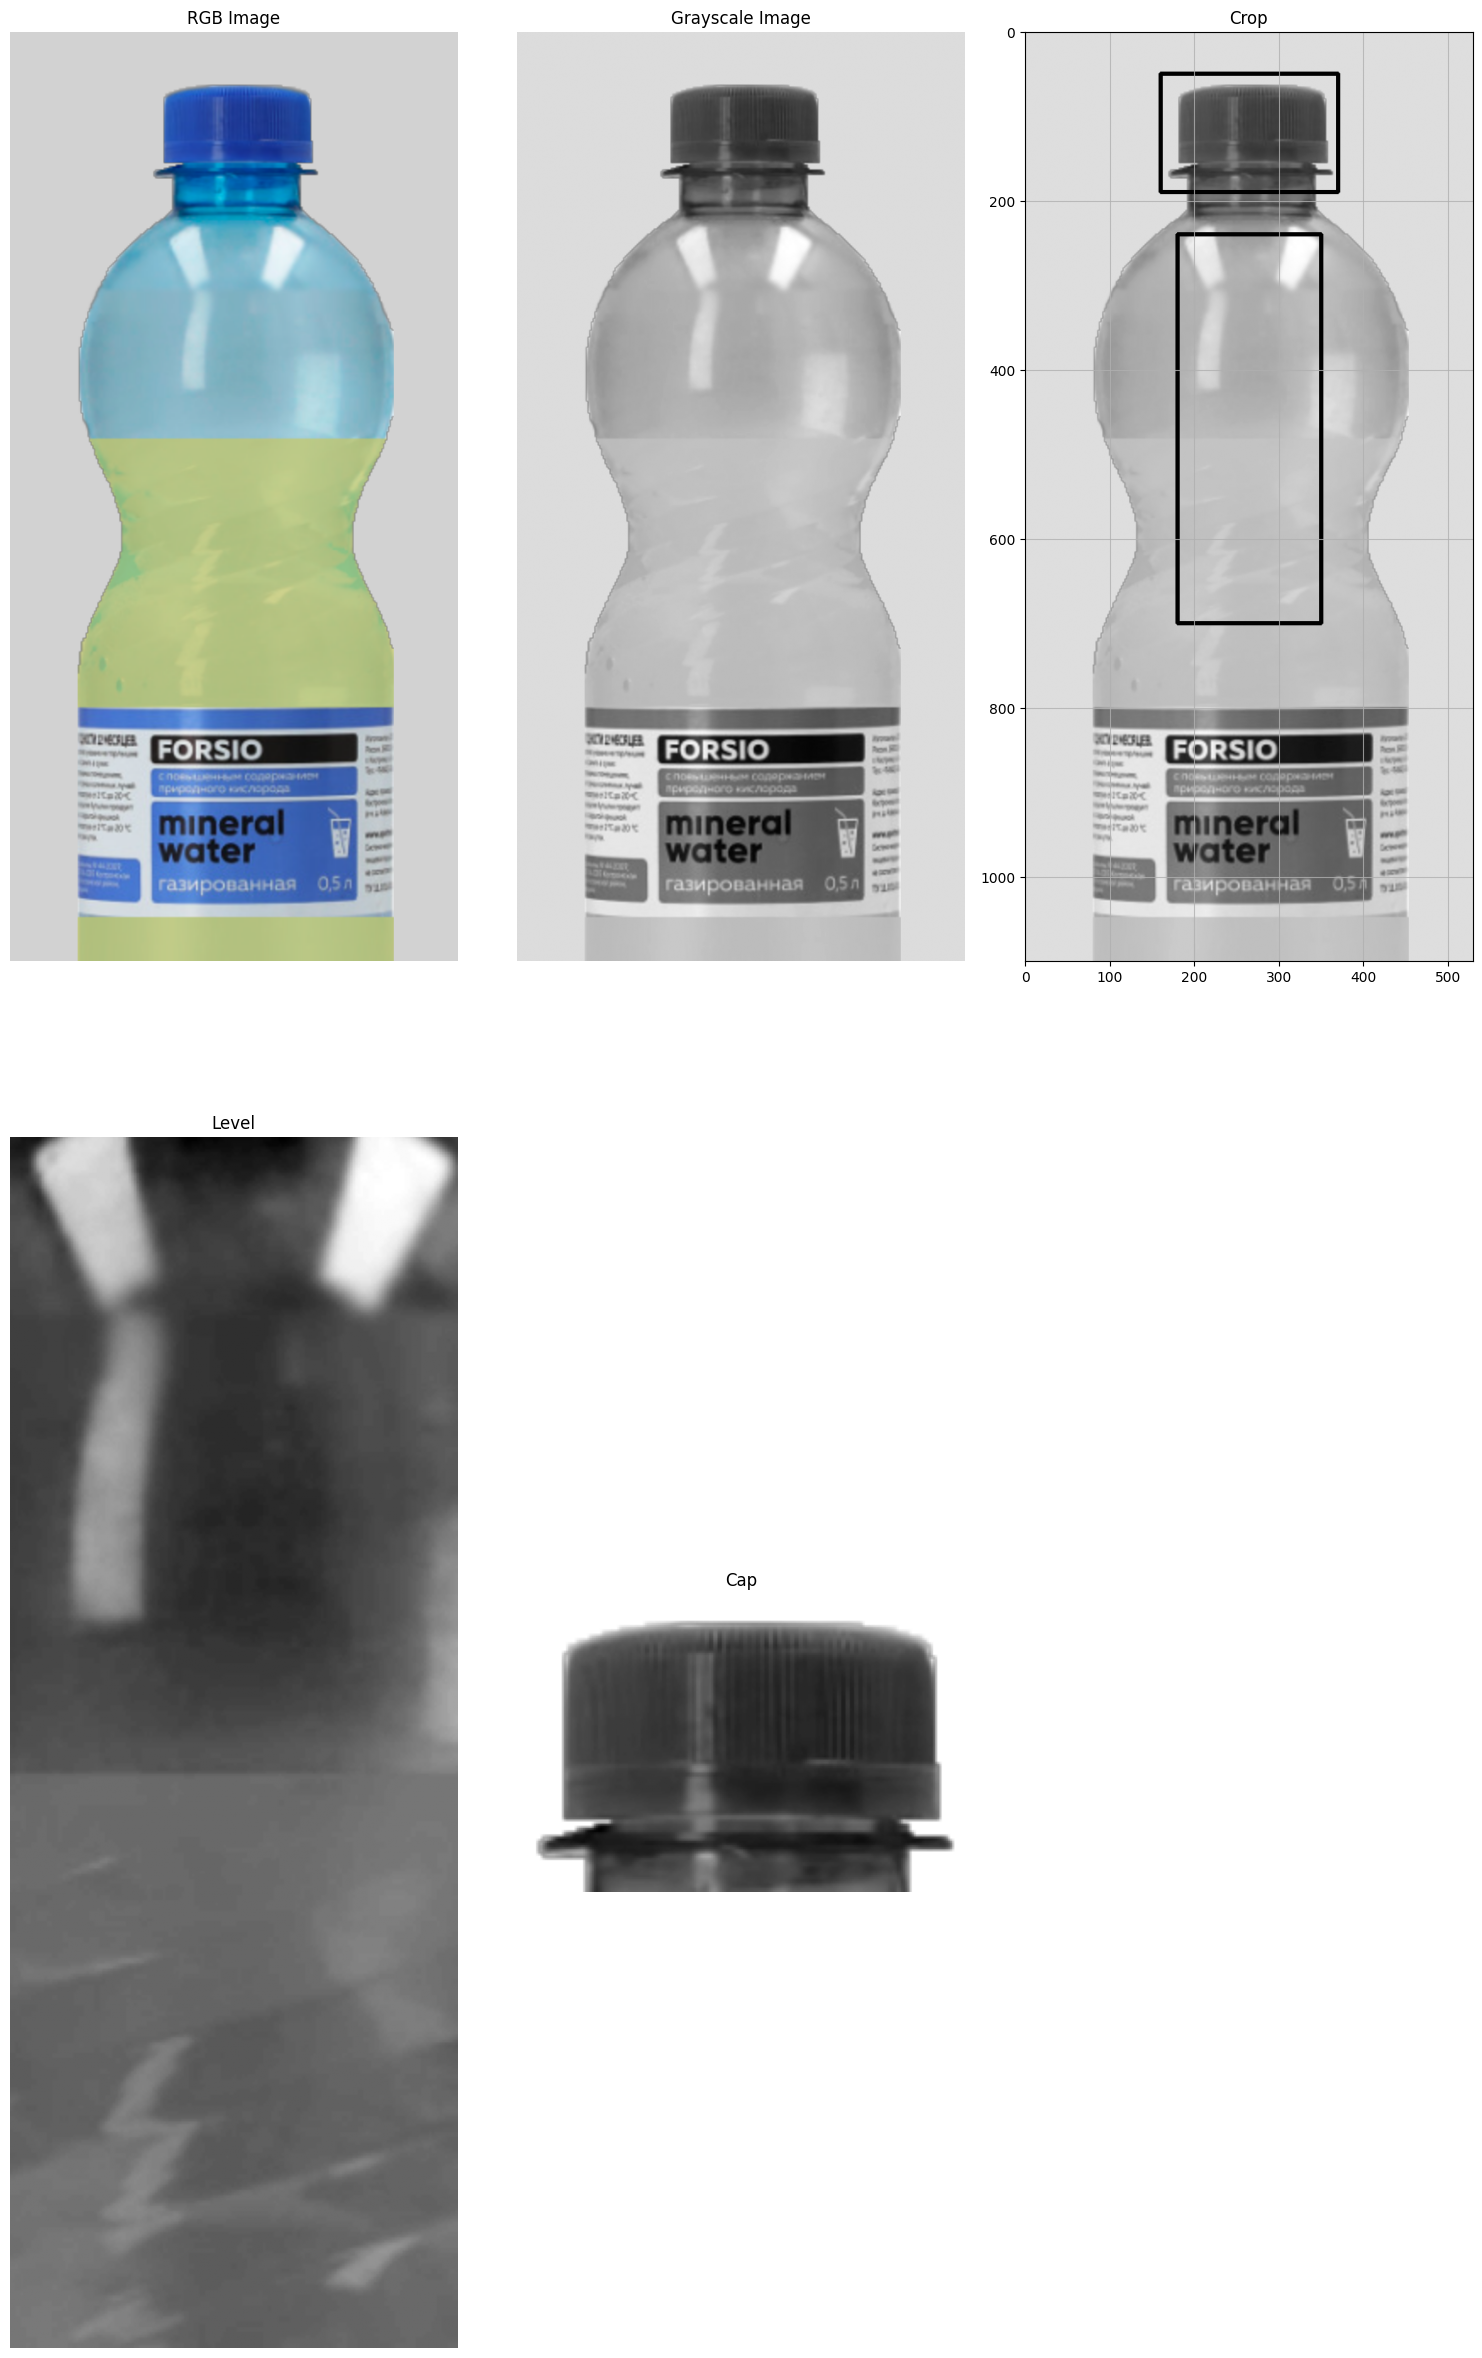

In [2741]:
# Конвертируем для отображения
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGRA2RGBA)

frame_gray = cv2.cvtColor(frame_rgb, cv2.COLOR_RGB2GRAY)


image_with_rect = frame_gray.copy()  # Создаём копию, чтобы не изменять оригинал


# Координаты прямоугольника (верхний левый и нижний правый углы)
cap_x1, cap_y1 = 160, 50 # верхний левый угол
cap_x2, cap_y2 = 370, 190  # нижний правый угол

cv2.rectangle(image_with_rect, (cap_x1, cap_y1), (cap_x2, cap_y2), color=(0, 255, 255), thickness=3)

image_crop_cap = frame_gray[cap_y1:cap_y2, cap_x1:cap_x2]


# Координаты прямоугольника (верхний левый и нижний правый углы)
level_x1, level_y1 = 180, 240  # верхний левый угол
level_x2, level_y2 = 350, 700  # нижний правый угол

cv2.rectangle(image_with_rect, (level_x1, level_y1), (level_x2, level_y2), color=(0, 0, 255), thickness=3)

image_crop_level = frame_gray[level_y1:level_y2, level_x1:level_x2]


# Создаем фигуру с двумя подграфиками в одной строке
plt.figure(figsize=(20, 50))  # Общий размер фигуры

# Первое изображение (цветное)
plt.subplot(1, 4, 1)  # 1 строка, 2 столбца, 1 позиция
plt.imshow(frame_rgb)
plt.axis('off')
plt.title('RGB Image')

# Второе изображение (оттенки серого)
plt.subplot(1, 4, 2)  # 1 строка, 2 столбца, 2 позиция
plt.imshow(frame_gray, cmap='gray')
plt.axis('off')
plt.title('Grayscale Image')

# Третье изображение 
plt.subplot(1, 4, 3) 
plt.imshow(image_with_rect, cmap='gray')
plt.grid(True, alpha=0.8)
#plt.axis('off')
plt.title('Crop')

plt.subplot(2, 4, 5) 
plt.imshow(image_crop_level, cmap='gray')
plt.axis('off')
plt.title('Level')

plt.subplot(2, 4, 6) 
plt.imshow(image_crop_cap, cmap='gray')
plt.axis('off')
plt.title('Cap')

# Показываем оба изображения вместе
plt.tight_layout()  # Автоматическая регулировка промежутков
plt.show()

In [2742]:
def detect_horizontal_lines(image_bw, 
                           canny_threshold1=30, 
                           canny_threshold2=90,
                           hough_threshold=50,
                           min_line_length=50,
                           max_line_gap=20,
                           angle_tolerance=5,
                           morph_size=10,
                           debug=False):
    """
    Обнаруживает горизонтальные линии на черно-белом изображении
    
    Параметры:
        debug: если True, показывает промежуточные этапы обработки
    """
    # 1. Улучшение контраста (если изображение темное)
    #equ = cv2.equalizeHist(image_bw)
    #equ = image_bw
    
    # 2. Гауссово размытие для уменьшения шума
    blurred = cv2.GaussianBlur(image_bw, (7, 7), 0)
    
    # 3. Детектирование границ
    edges = cv2.Canny(blurred, canny_threshold1, canny_threshold2)
    
    # 4. Морфологические операции для усиления линий
    kernel_horizontal = np.ones((1, morph_size), np.uint8)
    enhanced = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel_horizontal)
    
    # 5. Применяем преобразование Хафа
    lines = cv2.HoughLinesP(
        enhanced,
        rho=1,
        theta=np.pi/180,
        threshold=hough_threshold,
        minLineLength=min_line_length,
        maxLineGap=max_line_gap
    )
    
    horizontal_lines = []
    
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            angle = np.degrees(np.arctan2(y2 - y1, x2 - x1))
            
            # Фильтр горизонтальных линий (0° и 180° ± допуск)
            if (abs(angle) < angle_tolerance) or (abs(angle) > 180 - angle_tolerance):
                horizontal_lines.append((x1, y1, x2, y2))
    
    # Режим отладки
    if debug:
        plt.figure(figsize=(15, 10))
        
        plt.subplot(231)
        plt.imshow(image_bw, cmap='gray')
        plt.title("Original")
        
        plt.subplot(232)
        plt.imshow(blurred, cmap='gray')
        plt.title("blurred")
        
        plt.subplot(233)
        plt.imshow(edges, cmap='gray')
        plt.title("Canny Edges")
        
        plt.subplot(234)
        plt.imshow(enhanced, cmap='gray')
        plt.title("Enhanced Lines")
        
        plt.subplot(235)
        debug_img = cv2.cvtColor(image_bw, cv2.COLOR_GRAY2BGR)
        for line in horizontal_lines:
            x1, y1, x2, y2 = line
            cv2.line(debug_img, (x1, y1), (x2, y2), (0, 0, 255), 2)
        plt.imshow(debug_img)
        plt.title(f"Detected: {len(horizontal_lines)} lines")
        
        plt.tight_layout()
        plt.show()
    
    return horizontal_lines

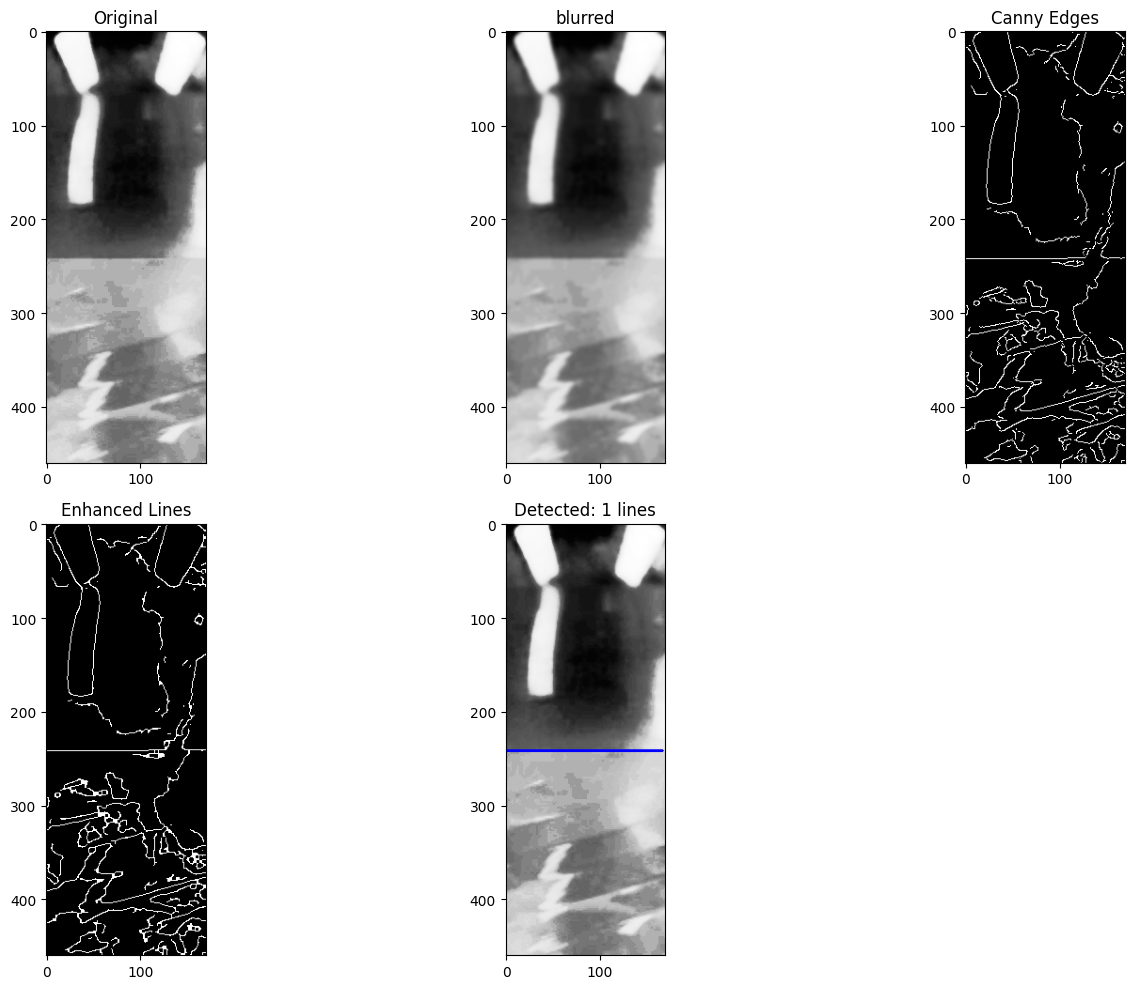

Таймер timer 332.75461196899414 мс


0.33275461196899414

In [2743]:
from my_timer import Timer

my_timer = Timer('timer')

my_timer.start()

#cv2.imwrite('test.jpg', image_with_rect_2)

image_equ = cv2.equalizeHist(image_crop_level)
# Обнаружение линий с визуализацией этапов
lines_level = detect_horizontal_lines(
    image_equ,
    canny_threshold1=40,
    canny_threshold2=15,
    hough_threshold=60,
    min_line_length=120,
    max_line_gap=50,
    angle_tolerance=3,
    morph_size=0,
    debug=True  # Включить режим диагностики!
)

my_timer.elapsed_time(print_log=True)


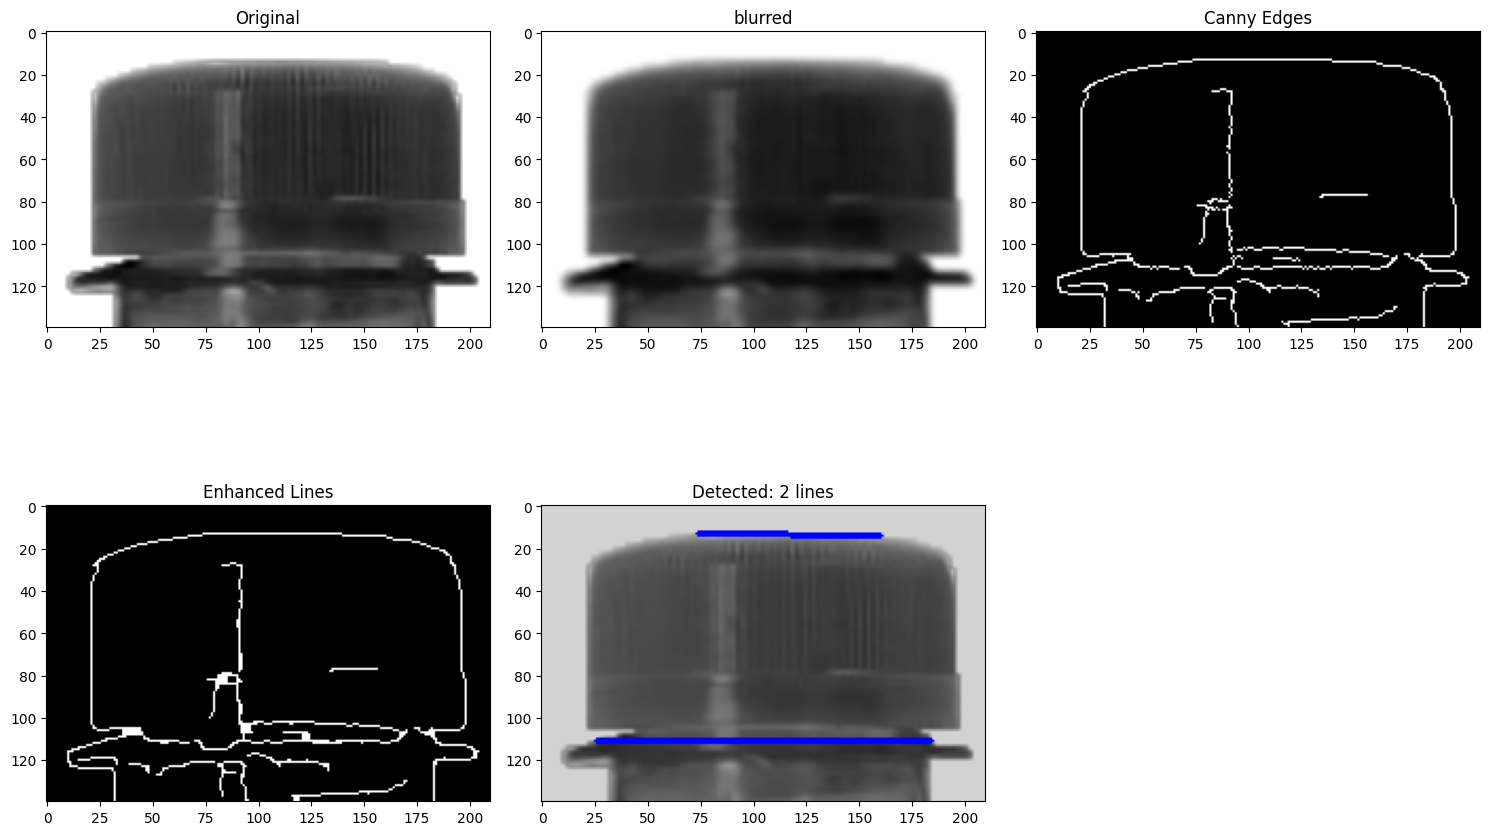

In [2744]:
cv2.imwrite('test_cap.jpg', image_crop_cap)

# Обнаружение линий с визуализацией этапов
lines_cap = detect_horizontal_lines(
    image_crop_cap,
    canny_threshold1=30,
    canny_threshold2=50,
    hough_threshold=70,
    min_line_length=50,
    max_line_gap=50,
    angle_tolerance=8,
    morph_size=0,
    debug=True  # Включить режим диагностики!
)

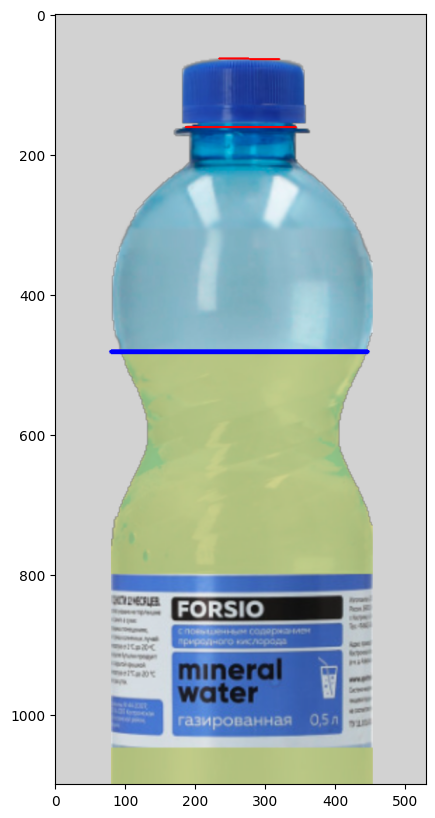

In [2745]:
# Конвертируем RGB в BGR перед рисованием
result = frame.copy()

for line in lines_cap:
    x1, y1, x2, y2 = line
    x1 = x1 + cap_x1
    y1 = y1 + cap_y1
    x2 = x2 + cap_x1
    y2 = y2 + cap_y1
    cv2.line(result, (x1, y1), (x2, y2), (0, 0, 255), 2)  # Синий в BGR


# for line in lines_level:
#     x1, y1, x2, y2 = line
#     x1 = x1 + level_x1 - 100
#     y1 = y1 + level_y1
#     x2 = x2 + level_x1 + 100
#     y2 = y2 + level_y1
#     cv2.line(result, (x1, y1), (x2, y2), (255, 0, 0), 6)  # Синий в BGR

# Сортируем линии по координате y1 (верхняя граница)

if len(lines_level) > 0:
    lines_level.sort(key=lambda line: line[1])  # line[1] это y1

    # Берем самую верхнюю линию (первую в отсортированном списке)
    top_line = lines_level[0]
    x1, y1, x2, y2 = top_line

    # Корректируем координаты
    x1 = x1 + level_x1 - 100
    y1 = y1 + level_y1
    x2 = x2 + level_x1 + 100
    y2 = y2 + level_y1

    # Рисуем только самую верхнюю линию
    cv2.line(result, (x1, y1), (x2, y2), (255, 0, 0), 6)  # Синий в BGR

# Конвертируем обратно в RGB для matplotlib
result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15, 10))
plt.imshow(result_rgb)
plt.show()